# Multi Perceptron

### 참고자료 :
- https://tykimos.github.io/2017/02/04/MLP_Getting_Started/

### 데이터 출처
- https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

### 데이터 정보
- 인스턴스 수 : 768개
- 속성 수 : 8가지
- 클래스 수 : 2가지
- 8가지 속성(1번~8번)과 결과(9번)의 상세 내용은 다음과 같습니다.
- 임신 횟수
- 경구 포도당 내성 검사에서 2시간 동안의 혈장 포도당 농도
- 이완기 혈압 (mm Hg)
- 삼두근 피부 두겹 두께 (mm)
- 2 시간 혈청 인슐린 (mu U/ml)
- 체질량 지수
- 당뇨 직계 가족력
- 나이 (세)
- 5년 이내 당뇨병이 발병 여

### 모델 구성
- 속성이 8개이기 때문에 입력 뉴런을 8개
- 이진 분류이기 때문에 0~1사이의 값을 나타내는 출력 뉴런이 1개

- 첫번째 Dense 레이어는 은닉층(hidden layer)으로 8개 뉴런을 입력받아 12개 뉴런을 출력
- 두번째 Dense 레이어는 은닉층으로 12개 뉴런을 입력받아 8개 뉴런을 출력
- 마지막 Dense 레이어는 출럭 레이어로 8개 뉴런을 입력받아 1개 뉴런을 출력

In [1]:
# 0. 사용할 패키지 불러오기
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# 랜덤시드 고정시키기
np.random.seed(5)

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# 1. 데이터 준비하기
dataset = np.loadtxt("./data/pima-indians-diabetes.data", delimiter=",")

# 2. 데이터셋 생성하기
x_train = dataset[:700,0:8]
y_train = dataset[:700,8]
x_test = dataset[700:,0:8]
y_test = dataset[700:,8]

In [3]:
# 3. 모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 4. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 5. 모델 학습시키기
model.fit(x_train, y_train, epochs=1500, batch_size=64,verbose=0)

In [4]:
# 6. 모델 평가하기

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1], scores[1]*100))

68/68 [==============================] - 0s 441us/step
acc: 76.47%


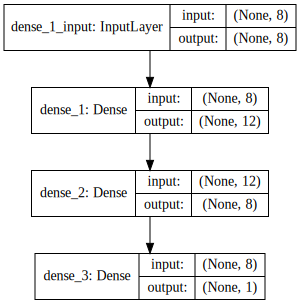

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))